In [60]:
#IMPORTS

import numpy as np
import matplotlib.pyplot as plt

In [61]:
#PARAMETERS

c = 2.99e8                   # m/s
n = 1.0                      # refractive index inside cavity (air)
L = 5e-3                     # cavity length (m) e.g., 5 mm
R = .9                      # mirror intensity reflectivity (both mirrors), lossless first pass
theta = 0.0                  # incidence angle (radians)
lam0 = 632e-9                # nominal wavelength (m)



In [66]:
#EQUATIONS

#wavelength sweep

F = 4*R / (1 - R)**2 #coefficient in Airy formula
FSR_lambda_approx = lam0**2 / (2*n*L) #near lam0

lamsweep = np.linspace(lam0 - 4*FSR_lambda_approx, lam0 + 4*FSR_lambda_approx, 4000)
delta1 = (4*np.pi*n*L*np.cos(theta)) / lamsweep #phase
T1 = 1.0 / (1.0 + F * np.sin(delta1/2.0)**2)  #normalized transmission (lossless symmetric)


#cavity length sweep

Lsweep = np.linspace(-2e-6,2e-6,4000) #sweep length
delta2 = (4*np.pi*n*(L+Lsweep)*np.cos(theta)) / lam0 #phase
T2 = 1.0 / (1.0 + F * np.sin(delta2/2.0)**2) #normalized transmission (lossless symmetric)


#reflectivity/finesse sweep
Rsweep = np.linspace(0,1-1e-9,1000) #sweep reflectivity
Fsweep = 4*Rsweep / (1 - Rsweep)**2 #sweep finesse
delta3 = (4*np.pi*n*L*np.cos(theta)) / lam0 #phase
T3 = 1.0 / (1.0 + Fsweep * np.sin(delta3/2.0)**2)  #normalized transmission (lossless symmetric)



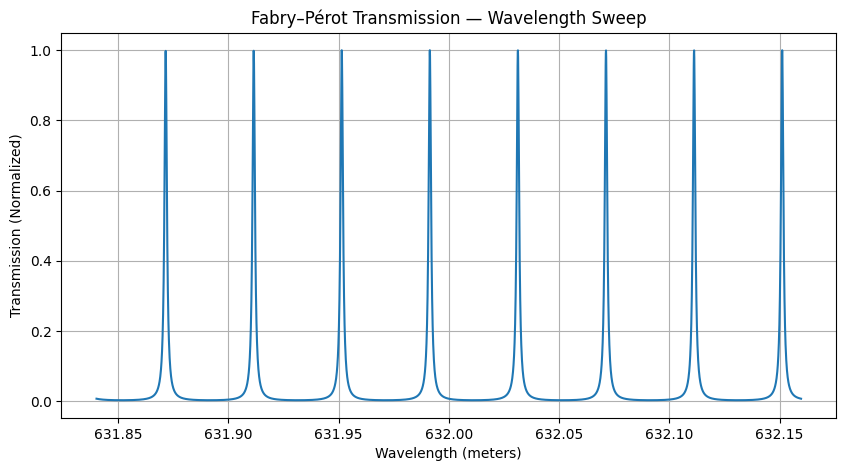

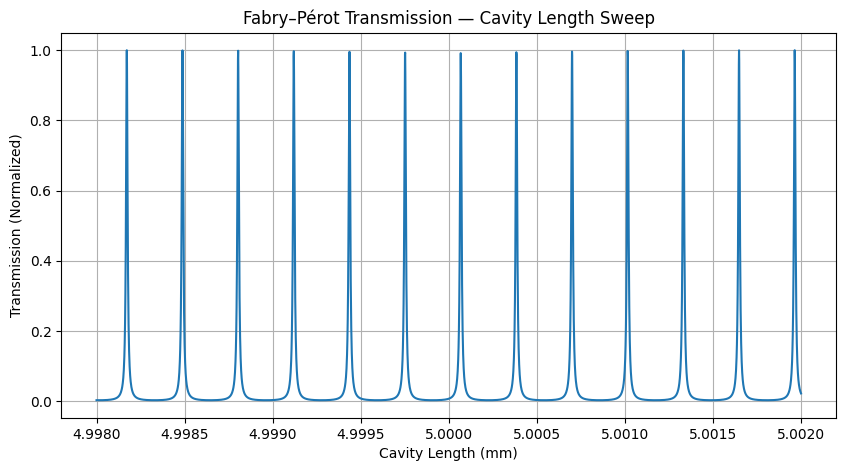

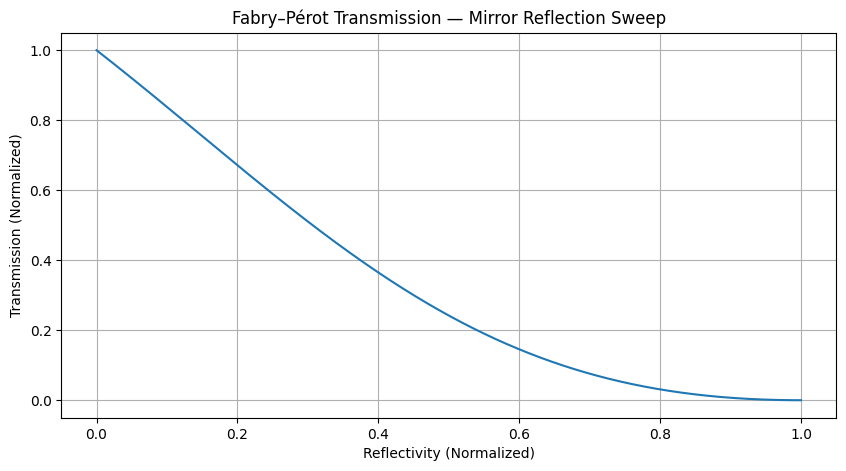

In [67]:
#PLOTS

#wavelength sweep

plt.figure(figsize=(10,5))
plt.plot(lam*1e9, T1)
plt.xlabel("Wavelength (meters)")
plt.ylabel("Transmission (Normalized)")
plt.title("Fabry–Pérot Transmission — Wavelength Sweep")
plt.grid(True)
plt.show()


#cavity length sweep

plt.figure(figsize=(10,5))
plt.plot((L+Lsweep)*1e3, T2)
plt.xlabel("Cavity Length (mm)")
plt.ylabel("Transmission (Normalized)")
plt.title("Fabry–Pérot Transmission — Cavity Length Sweep")
plt.grid(True)
plt.show()

#reflectivity/finesse length sweep

plt.figure(figsize=(10,5))
plt.plot(Rsweep, T3)
plt.xlabel("Reflectivity (Normalized)")
plt.ylabel("Transmission (Normalized)")
plt.title("Fabry–Pérot Transmission — Mirror Reflection Sweep")
plt.grid(True)
plt.show()




